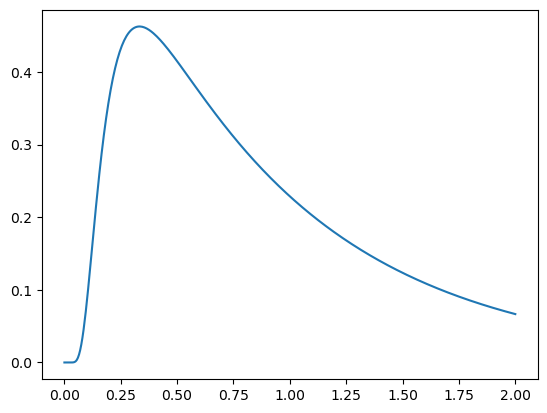

In [1]:
import matplotlib.pyplot as plt
from pyddm import Model
m = Model()
s = m.solve()
plt.plot(s.t_domain, s.pdf("correct"))
# plt.savefig("helloworld.png")
plt.show()

In [2]:
from pyddm import Model
from pyddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

model = Model(name='Simple model',
              drift=DriftConstant(drift=2.2),
              noise=NoiseConstant(noise=1.5),
              bound=BoundConstant(B=1.1),
              overlay=OverlayNonDecision(nondectime=.1),
              dx=.001, dt=.01, T_dur=2)
display_model(model)
sol = model.solve()

Model Simple model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fixed parameters:
    - drift: 2.200000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.500000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.100000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fixed parameters:
    - nondectime: 0.100000



In [3]:
# generate sudo-data
samp = sol.resample(1000)

In [4]:
from pyddm import Fittable, Fitted
from pyddm.models import LossRobustBIC
from pyddm.functions import fit_adjust_model
model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=-1, maxval=4)),
                  noise=NoiseConstant(noise=Fittable(minval=0.1, maxval=4)),
                  bound=BoundConstant(B=Fittable(minval=0.1, maxval=4)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0, maxval=1)),
                  dx=.001, dt=.01, T_dur=2)

fit_adjust_model(samp, model_fit,
                 fitting_method="differential_evolution",
                 lossfunction=LossRobustBIC, verbose=False)

Info: Params [2.23971287 1.43946939 1.09999019 0.10317692] gave 446.52850022351646


Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(2.239712872965137, minval=-1, maxval=4)), noise=NoiseConstant(noise=Fitted(1.4394693913749652, minval=0.1, maxval=4)), bound=BoundConstant(B=Fitted(1.0999901913061898, minval=0.1, maxval=4)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.10317691944344565, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=2, fitresult=FitResult(fitting_method='differential_evolution', method='auto', loss='BIC', value=446.52850022351646, nparams=4, samplesize=1000, mess=''))

In [5]:
display_model(model_fit)

Model Simple model (fitted) information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 2.239713
Noise component NoiseConstant:
    constant
    Fitted parameters:
    - noise: 1.439469
Bound component BoundConstant:
    constant
    Fitted parameters:
    - B: 1.099990
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fitted parameters:
    - nondectime: 0.103177
Fit information:
    Loss function: BIC
    Loss function value: 446.52850022351646
    Fitting method: differential_evolution
    Solver: auto
    Other properties:
        - nparams: 4
        - samplesize: 1000
        - mess: ''



In [6]:
model_fit.parameters()

{'drift': {'drift': Fitted(2.239712872965137, minval=-1, maxval=4)},
 'noise': {'noise': Fitted(1.4394693913749652, minval=0.1, maxval=4)},
 'bound': {'B': Fitted(1.0999901913061898, minval=0.1, maxval=4)},
 'IC': {},
 'overlay': {'nondectime': Fitted(0.10317691944344565, minval=0, maxval=1)}}

In [7]:
model_fit.get_fit_result().value()

446.52850022351646

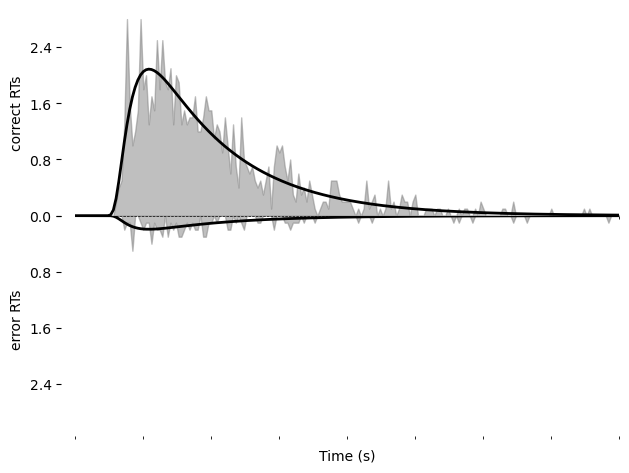

In [8]:
import pyddm.plot
import matplotlib.pyplot as plt
pyddm.plot.plot_fit_diagnostics(model=model_fit, sample=samp)
plt.savefig("simple-fit.png")
plt.show()

In [9]:
# importing library
from scipy.stats import invgauss   
     
numargs = invgauss.numargs 
[a, b] = [0.7, 0.4] * numargs 
rv = invgauss (a, b) 
     
print ("RV : \n", rv)  

RV : 


In [10]:
import numpy as np 
quantile = np.arange (0.01, 1) 
      
# Random Variates 
R = invgauss.ppf(0.01, a) 
print ("Random Variates : \n", R) 
     
# PDF 
R = invgauss.pdf(invgauss.ppf(0.01, a), a) 
print ("\nProbability Distribution : \n", R) 

Random Variates : 
 0.11058653206428558

Probability Distribution : 
 0.4397181687561739


Distribution : 
 [0.         0.06122449 0.12244898 0.18367347 0.24489796 0.30612245
 0.36734694 0.42857143 0.48979592 0.55102041 0.6122449  0.67346939
 0.73469388 0.79591837 0.85714286 0.91836735 0.97959184 1.04081633
 1.10204082 1.16326531 1.2244898  1.28571429 1.34693878 1.40816327
 1.46938776 1.53061224 1.59183673 1.65306122 1.71428571 1.7755102
 1.83673469 1.89795918 1.95918367 2.02040816 2.08163265 2.14285714
 2.20408163 2.26530612 2.32653061 2.3877551  2.44897959 2.51020408
 2.57142857 2.63265306 2.69387755 2.75510204 2.81632653 2.87755102
 2.93877551 3.        ]


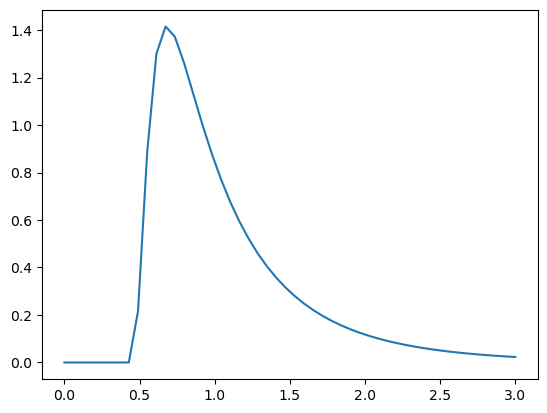

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
     
distribution = np.linspace(0, np.minimum(rv.dist.b, 3)) 
print("Distribution : \n", distribution) 
     
plot = plt.plot(distribution, rv.pdf(distribution)) 

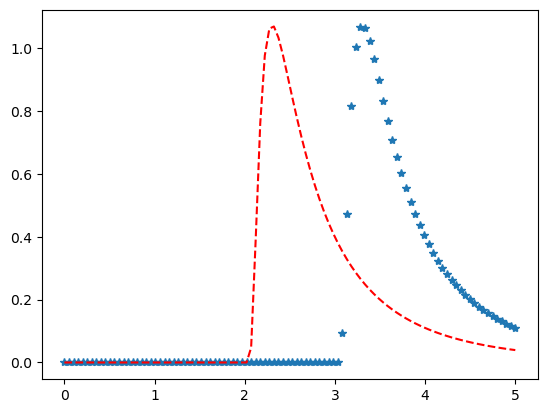

In [13]:
import matplotlib.pyplot as plt 
import numpy as np 
     
x = np.linspace(0, 5, 100) 
     
# Varying positional arguments 
y1 = invgauss .pdf(x, 1, 3) 
y2 = invgauss .pdf(x, 1, 2) 
plt.plot(x, y1, "*", x, y2, "r--") 